# 图像标签服务初始化

### 引入相关的类库

In [6]:
# 调用包从图像识别包中调用，图像标签,工具包
from image_sdk.utils import encode_to_base64
from image_sdk.image_tagging import image_tagging_aksk
from image_sdk.utils import init_global_env
# 调用 json 解析传回的结果
import json
# 操作系统文件/文件夹的包
import os
import shutil
# 图像处理展示相关的包
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### 设置相关参数

In [7]:
init_global_env('cn-north-4')
# 准备 ak,sk
app_key = 'Z7SGEX75VG9QAC2DEJN4'
app_secret = 'E9Jng1euLFlPsiY8OmIQ4qidq9UDGhiomh2NPYaQ'

### 使用网络图像测试

In [8]:
# 使用网络图像测试
demo_data_url = 'https://img2.baidu.com/it/u=766249321,3457443746&fm=26&fmt=auto'
# call interface use the url
result = image_tagging_aksk(app_key, app_secret, '', demo_data_url, 'zh', 5, 30)
# 转化成 Python 字典形式
tags = json.loads(result)
print(tags)

{'result': {'tags': [{'confidence': '99.71', 'i18n_tag': {'en': 'Person', 'zh': '人'}, 'tag': '人', 'type': 'object'}, {'confidence': '90.75', 'i18n_tag': {'en': 'Woman', 'zh': '女人'}, 'tag': '女人', 'type': 'object'}, {'confidence': '84.23', 'i18n_tag': {'en': 'Single', 'zh': '一个人'}, 'tag': '一个人', 'type': 'object'}, {'confidence': '81.93', 'i18n_tag': {'en': 'Female sex', 'zh': '女性'}, 'tag': '女性', 'type': 'object'}, {'confidence': '81.45', 'i18n_tag': {'en': 'Beauty', 'zh': '美女'}, 'tag': '美女', 'type': 'object'}]}}


# 利用标签打标相关的照片

### 打标一张图片

In [9]:
# 确定电子相册位置
file_path ='data/'
file_name = 'pic3.jpg'
# 保存图片标签的字典
labels={}
# 图像打标
result = image_tagging_aksk(app_key, app_secret, encode_to_base64(file_path + file_name), '', 'zh', 5, 
60)
# 解析结果
result_dic = json.loads(result)
# 保存到字典中
labels[file_name] = result_dic['result']['tags']
print(labels)

{'pic3.jpg': [{'confidence': '95.9', 'i18n_tag': {'en': 'Lion', 'zh': '狮子'}, 'tag': '狮子', 'type': 'object'}, {'confidence': '91.97', 'i18n_tag': {'en': 'Carnivora', 'zh': '食肉目'}, 'tag': '食肉目', 'type': 'object'}, {'confidence': '87.27', 'i18n_tag': {'en': 'Cat', 'zh': '猫'}, 'tag': '猫', 'type': 'object'}, {'confidence': '86.89', 'i18n_tag': {'en': 'Animal', 'zh': '动物'}, 'tag': '动物', 'type': 'object'}, {'confidence': '74.74', 'i18n_tag': {'en': 'Hairy', 'zh': '毛茸茸'}, 'tag': '毛茸茸', 'type': 'object'}]}


### 打标data文件夹下所有图片

In [10]:
# 确定电子相册位置
file_path ='data/'
# 保存图片标签的字典
labels = {}
items = os.listdir(file_path)
for i in items:
    # 判断是否为文件，而不是文件夹
    if os.path.isfile:
        # 华为云 EI 目前支持 JPG/PNG/BMP 格式的图片
        if i.endswith('jpg') or i.endswith('jpeg') or i.endswith('bmp') or i.endswith('png'):
            # 为图片打上标签
            result = image_tagging_aksk(app_key, app_secret, encode_to_base64(file_path + i), '', 'zh', 5, 60)
            # 解析返回的结果
            result_dic = json.loads(result)
            # 将文件名与图片对齐
            labels[i] = result_dic['result']['tags']
# 显示结果
print(labels)

{'pic8.jpg': [{'confidence': '77.85', 'i18n_tag': {'en': 'Dandelion', 'zh': '蒲公英'}, 'tag': '蒲公英', 'type': 'object'}, {'confidence': '74.6', 'i18n_tag': {'en': 'Plant', 'zh': '植物'}, 'tag': '植物', 'type': 'object'}, {'confidence': '74.58', 'i18n_tag': {'en': 'Natural', 'zh': '自然'}, 'tag': '自然', 'type': 'object'}, {'confidence': '72.08', 'i18n_tag': {'en': 'Green', 'zh': '绿色'}, 'tag': '绿色', 'type': 'object'}, {'confidence': '70.83', 'i18n_tag': {'en': 'Herbal', 'zh': '草本植物'}, 'tag': '草本植物', 'type': 'object'}], 'pic2.jpg': [{'confidence': '99.51', 'i18n_tag': {'en': 'Cat', 'zh': '猫'}, 'tag': '猫', 'type': 'object'}, {'confidence': '99.03', 'i18n_tag': {'en': 'Carnivora', 'zh': '食肉目'}, 'tag': '食肉目', 'type': 'object'}, {'confidence': '88.87', 'i18n_tag': {'en': 'Field road', 'zh': '田野路'}, 'tag': '田野路', 'type': 'scene'}, {'confidence': '86.07', 'i18n_tag': {'en': 'Animal', 'zh': '动物'}, 'tag': '动物', 'type': 'object'}, {'confidence': '83.25', 'i18n_tag': {'en': 'Mammal', 'zh': '哺乳动物'}, 'tag': '哺乳

### 保存打标结果

In [11]:
#将标签字典保存到文件
save_path = './label'
# 如果文件夹不存在则创建文件
if not os.path.exists(save_path):
    os.mkdir(save_path)
# 创建文件,执行写入操作，并关闭
with open(save_path + '/labels.json', 'w+') as f:
    f.write(json.dumps(labels))

# 利用打标结果制作动态相册

### 重新打开保存的标注结果

In [12]:
# 打开刚刚保存的文件
label_path = 'label/labels.json'
with open(label_path,'r') as f:
    labels = json.load(f)

### 利用关键字进行搜索

In [13]:
# 搜索关键词
key_word = input('请输入搜索词')
# 设置可信百分比
threshold = 60
# 设置一个集合（集合内只存在唯一的元素）
valid_list = set()
# 遍历 labels 中的字典获取所有包含关键字的图片名字
for k,v in labels.items():
    for item in v:
        if key_word in item['tag'] and float(item['confidence']) >= threshold:
            valid_list.add(k)
# 展示结果
valid_list = list(valid_list)
print(valid_list)

请输入搜索词猫
['pic6.jpg', 'pic2.jpg', 'pic3.jpg']


### 展示相关的图片

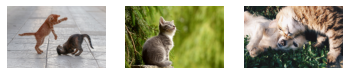

In [14]:
# 设置画布大小
plt.figure(24)
# 将每张图片依次排列到画布上
for k,v in enumerate(valid_list[:9]):
    pic_path = 'data/' + v
    img = Image.open(pic_path)
    img = img.resize((640,400))
    plt.subplot(331 + k)
    plt.axis('off')
    plt.imshow(img)
plt.show()

### 制作 gif 图片

In [15]:
# 生成一个临时文件夹
if not os.path.exists('tmp'):
    os.mkdir('tmp')
# 将所有搜索到的图像转化为 gif 格式，并存储在临时文件夹中
gif_list = []
for k, pic in enumerate(valid_list):
    pic_path = 'data/' + pic
    img = Image.open(pic_path)
    img = img.resize((640,380))
    save_name = 'tmp/'+ str(k) + '.gif'
    img.save(save_name)
    gif_list.append(save_name)
# 打开已经所有静止的 gif 图片
images=[]
for i in gif_list:
    pic_path = i
    images.append(Image.open(pic_path))
# 存储成动图 gif
images[0].save('相册动图.gif',
    save_all=True,
    append_images=images[1:],
    duration=1000,
    loop=0)
# 释放内存
del images
# 删除临时文件夹
shutil.rmtree('tmp')
print('gif 相册制作完成')

gif 相册制作完成


# 利用标签对照片进行自动分类

In [16]:
# 打开保存的 labels 文件
label_path = 'label/labels.json'
with open(label_path,'r') as f:
    labels = json.load(f)
print(labels)
# 获取置信度最高的文件分类
classes =[[v[0]['tag'],k] for k, v in labels.items()]
classes
for cls in classes:
    if not os.path.exists('data/' + cls[0]):
        os.mkdir('data/'+ cls[0])
    # 复制被对应的图片
    shutil.copy('data/'+ cls[1], 'data/'+ cls[0]+ '/' + cls[1])
print('已完成移复制!')

{'pic8.jpg': [{'confidence': '77.85', 'i18n_tag': {'en': 'Dandelion', 'zh': '蒲公英'}, 'tag': '蒲公英', 'type': 'object'}, {'confidence': '74.6', 'i18n_tag': {'en': 'Plant', 'zh': '植物'}, 'tag': '植物', 'type': 'object'}, {'confidence': '74.58', 'i18n_tag': {'en': 'Natural', 'zh': '自然'}, 'tag': '自然', 'type': 'object'}, {'confidence': '72.08', 'i18n_tag': {'en': 'Green', 'zh': '绿色'}, 'tag': '绿色', 'type': 'object'}, {'confidence': '70.83', 'i18n_tag': {'en': 'Herbal', 'zh': '草本植物'}, 'tag': '草本植物', 'type': 'object'}], 'pic2.jpg': [{'confidence': '99.51', 'i18n_tag': {'en': 'Cat', 'zh': '猫'}, 'tag': '猫', 'type': 'object'}, {'confidence': '99.03', 'i18n_tag': {'en': 'Carnivora', 'zh': '食肉目'}, 'tag': '食肉目', 'type': 'object'}, {'confidence': '88.87', 'i18n_tag': {'en': 'Field road', 'zh': '田野路'}, 'tag': '田野路', 'type': 'scene'}, {'confidence': '86.07', 'i18n_tag': {'en': 'Animal', 'zh': '动物'}, 'tag': '动物', 'type': 'object'}, {'confidence': '83.25', 'i18n_tag': {'en': 'Mammal', 'zh': '哺乳动物'}, 'tag': '哺乳